In [31]:
from data_cleaning import data_cleaning
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing

In [32]:

# import numpy as np
# import pandas as pd
# from sklearn.neighbors import KNeighborsRegressor
# import math

# def dummies(df, col_name):
#    return pd.concat([df.drop(col_name, axis=1), pd.get_dummies(df[col_name])], axis=1)

# def data_cleaning(df):
#     #Removes Unwatned Columns
#     #Removes Unwanted Weight Classes
#     #Calculate KNN missing Reach Vals
#     #Reduce Outlier Data (Weights)
#     #Fills Null Values (AGE)
#     #Converts Categorical to Dummies
#     #Converts Binary to Boolean
    

#     #define wanted columns from OG data
#     desired_cols = [
#         'Winner',
#         'weight_class',
#         'B_age',
#         'B_Height_cms',
#         'B_Reach_cms',
#         'B_Weight_lbs',
#         'R_Height_cms',
#         'R_Reach_cms',
#         'R_Weight_lbs',
#         'R_age',]

#     df = df[desired_cols]


#     #Fill NaN age values with column means ¯\_(ツ)_/¯
#     df["B_age"] = df["B_age"].fillna(df["B_age"].mean())
#     df["R_age"] = df["R_age"].fillna(df["R_age"].mean())
    

#     #Replace Missing Values using KNN
#     #Combine all B and R values together for single master list
#     r_cols = ["R_Height_cms","R_Reach_cms"]
#     b_cols = ["B_Height_cms","B_Reach_cms"]
#     header = ["Height","Reach"]

#     R_heights_to_reach = df[r_cols]
#     R_heights_to_reach.columns = header
#     B_heights_to_reach = df[b_cols]
#     B_heights_to_reach.columns = header
#     MasterHR = R_heights_to_reach.append(B_heights_to_reach,ignore_index=True)

#     #Train the KNN Model
#     num_neighbors = 3 
#     trainer = MasterHR.dropna()
#     X = np.array(list(trainer["Height"])).reshape(len(trainer),1)
#     y = np.array(list(trainer["Reach"])).reshape(len(trainer),1)
#     nay = KNeighborsRegressor(n_neighbors=num_neighbors).fit(X,y)

#     #Replace vals with KNN predictions
#     df["R_Reach_cms"] = df.apply(lambda x: nay.predict(np.array(x["R_Height_cms"]).reshape(1,1))[0][0] if math.isnan(x["R_Reach_cms"]) else x["R_Reach_cms"],axis=1)
#     df["B_Reach_cms"] = df.apply(lambda x: nay.predict(np.array(x["B_Height_cms"]).reshape(1,1))[0][0] if math.isnan(x["B_Reach_cms"]) else x["B_Reach_cms"],axis=1)


#     #Remove unwanted weight divisions (ROWS)
#     to_drop = ['Open Weight',
#                'Catch Weight',
#                "Women's Strawweight",
#                "Women's Flyweight",
#                "Women's Bantamweight",
#                "Women's Featherweight"]
#     for each in to_drop:
#         df = df[df["weight_class"]!=each]
    
#     #Convert Binary Winner to Boolean
#     df["Winner"] = df["Winner"].apply(lambda x: True if x == "Red" else False)
    
#     #Calculate Delta Values (RED WINNER MINUS BLUE LOSER)
#     df["Reach_Delta"] = df["R_Reach_cms"] - df["B_Reach_cms"]
#     df["Height_Delta"] = df["R_Height_cms"] - df["B_Height_cms"]
#     df["Weight_Delta"] = df["R_Weight_lbs"] - df["B_Weight_lbs"]
#     df["age_Delta"] = df["R_age"] - df["B_age"]
    
    
#     #Drop Figthers over the 265 Heavyweight limit
#     df = df[df["R_Weight_lbs"]<=265]
#     df = df[df["B_Weight_lbs"]<=265]
    
#     #Drop Red vs Blue Data Columns
#     cols = ["R_Reach_cms",
#             "B_Reach_cms",
#             "R_Height_cms",
#             "B_Height_cms",
#             "R_Weight_lbs",
#             "B_Weight_lbs",
#             "R_age",
#             "B_age"]
#     df = df.drop(columns = cols)
    
#     df = dummies(df,"weight_class")
    
    
#     return df

In [33]:
#USE UPDATED_DATA.CSV WITH MANUALLY FILLED IN MISSING VALS
df = pd.read_csv("data/updated_data.csv")

In [34]:
cleaned_df = data_cleaning(df)

/Users/matthewhwang/Galvanize/Capstone2/UFC/data_cleaning.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["B_age"] = df["B_age"].fillna(df["B_age"].mean())
/Users/matthewhwang/Galvanize/Capstone2/UFC/data_cleaning.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["R_age"] = df["R_age"].fillna(df["R_age"].mean())
/Users/matthewhwang/Galvanize/Capstone2/UFC/data_cleaning.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [35]:
cleaned_df.head()

,Winner,Reach_Delta,Height_Delta,Weight_Delta,age_Delta,Bantamweight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight
0,True,-7.62,-5.08,0.0,1.0,1,0,0,0,0,0,0,0
2,True,7.62,-5.08,0.0,-1.0,0,0,0,0,0,1,0,0
3,False,2.54,-7.62,0.0,3.0,1,0,0,0,0,0,0,0
4,False,5.08,7.62,14.0,-6.0,0,0,0,1,0,0,0,0
6,True,15.24,2.54,0.0,-3.0,1,0,0,0,0,0,0,0


(array([1.000e+00, 4.000e+00, 1.300e+01, 3.500e+01, 4.900e+02, 3.228e+03,
        7.710e+02, 1.130e+02, 2.400e+01, 3.000e+00]),
 array([-109.01 ,  -90.109,  -71.208,  -52.307,  -33.406,  -14.505,
           4.396,   23.297,   42.198,   61.099,   80.   ]),
 <a list of 10 Patch objects>)

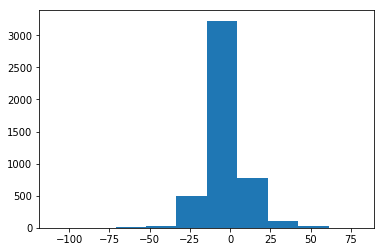

In [36]:
import matplotlib.pyplot as plt
plt.hist(cleaned_df["Weight_Delta"])

In [37]:
cleaned_df["Weight_Delta"].describe()

count    4682.000000
mean        0.211933
std        12.049275
min      -109.010000
25%         0.000000
50%         0.000000
75%         0.000000
max        80.000000
Name: Weight_Delta, dtype: float64

In [38]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4682 entries, 0 to 5037
Data columns (total 13 columns):
Winner               4682 non-null bool
Reach_Delta          4682 non-null float64
Height_Delta         4682 non-null float64
Weight_Delta         4682 non-null float64
age_Delta            4682 non-null float64
Bantamweight         4682 non-null uint8
Featherweight        4682 non-null uint8
Flyweight            4682 non-null uint8
Heavyweight          4682 non-null uint8
Light Heavyweight    4682 non-null uint8
Lightweight          4682 non-null uint8
Middleweight         4682 non-null uint8
Welterweight         4682 non-null uint8
dtypes: bool(1), float64(4), uint8(8)
memory usage: 224.0 KB


In [39]:
y = cleaned_df["Winner"]
X = cleaned_df.drop("Winner",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [40]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
accuracy = clf.score(X_test,y_test)
conf_dict = {'TT': 0, 'FF':0, 'TF':0, 'FT':0}
tot = len(y_test)
for i in range(tot):
    abbrev = str(clf.predict(X_test)[i])[0] + str(y_test.iloc[i])[0]
    conf_dict[abbrev] += 1
recall = conf_dict['TT']/(conf_dict['TT'] + conf_dict['FT'])
precision = conf_dict['TT']/(conf_dict['TT'] + conf_dict['TF'])
print('Accuracy : ',round(accuracy,2))
print('Recall (reality): ',round(recall,2))
print('Precision (prediction): ',round(precision,2))

Accuracy :  0.65
Recall (reality):  0.82
Precision (prediction):  0.7
